In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

(512, 1024, 3)

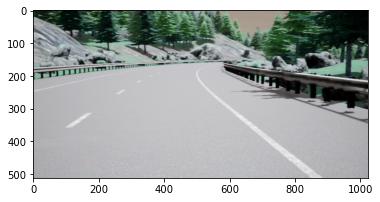

In [2]:
image_fn = str(Path("../../../data/Town04_Clear_Noon_09_09_2020_14_57_22_frame_625_validation_set.png"))
image = cv2.imread(image_fn)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image.shape

In [3]:
run_student_code = False

In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(str(Path('../../')))
if run_student_code:
    from exercises.lane_detection.lane_detector import LaneDetector
else:
    from solutions.lane_detection.lane_detector import LaneDetector

In [5]:
# TODO: Change the next line(s), to create an instance of *your* LaneDetector
model_path = Path("../../solutions/lane_detection/best_model_multi_dice_loss.pth")
ld = LaneDetector(model_path=model_path)

In [6]:
if run_student_code:
    from exercises.camera_calibration.camera_calibrator import CameraCalibrator
else:
    from solutions.camera_calibration.camera_calibrator import CameraCalibrator

In [7]:
cc = CameraCalibrator(ld, cut_v = 300)

In [8]:
poly_left, poly_right = cc.get_lane_lines_from_file(image_fn)

In [9]:
u = np.arange(0,ld.cg.image_width, 1)
v_left = poly_left(u)
v_right = poly_right(u)

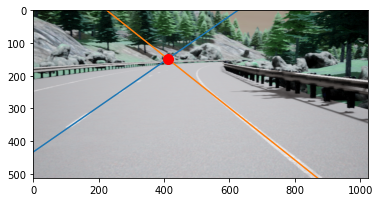

In [10]:
# plot image
plt.imshow(image)
# plot detected lane lines
plt.plot(u,v_left)
plt.plot(u,v_right)
plt.xlim(0,ld.cg.image_width)
plt.ylim(ld.cg.image_height,0)

# plot intersection of lane lines
u_i, v_i = cc.get_vanishing_point_from_file(image_fn)
plt.scatter([u_i],[v_i], marker="o", s=100, color="r", zorder=10)